<a href="https://colab.research.google.com/github/xc308/Python_Data_Analysis/blob/main/5_Hypothesis_Testing_Confidence_Interval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal: Predict the distribtion of diamonds
## Task: Pricing new diamonds based on past sales

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats # for inference


In [3]:
df = pd.read_csv("diamonds.csv")

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.describe()

,carat,depth,table,price,x,y,z
count,53941.000000,53941.000000,53941.000000,53941.000000,53941.000000,53941.000000,53941.000000
mean,0.797953,61.749447,57.457231,3932.885875,5.731183,5.734554,3.538753
std,0.474016,1.432641,2.234497,3989.452937,1.121767,1.142143,0.705707
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5325.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<Axes: xlabel='price', ylabel='Count'>

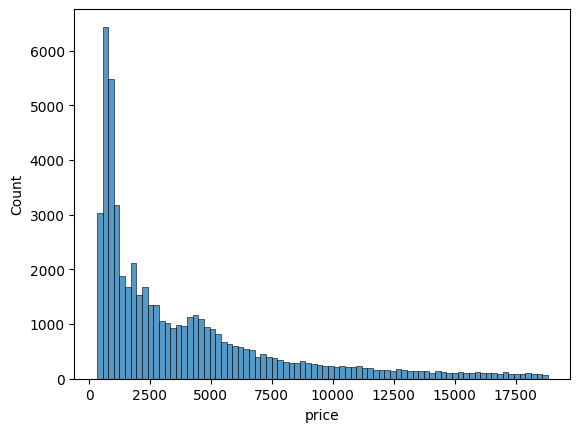

In [7]:
sns.histplot(df, x= "price") # skewed

In [11]:
## CI for mean of price


# variables for sample size, sample std, sample statitics, CI level

n = df["price"].count()
xbar = df["price"].mean()
s = df["price"].std()
ci_level = 0.95


# std error of the mean: measure how much is the sample mean is expected to vary from sample to sample
std_err_mean = s/np.sqrt(n)


# calculate CI
CI_intval = stats.norm.interval(confidence= ci_level, loc = xbar, scale = std_err_mean)
print(CI_intval)

print("With 95% CI level, the true mean price is fall between", CI_intval[0], CI_intval[1])


(np.float64(3899.219067451682), np.float64(3966.5526831647326))
With 95% CI level, the true mean price is fall between 3899.219067451682 3966.5526831647326


## One sample t - test

- H0: average price of primume cut <= 4500
- H1: .... > 4500

- significant level alpha = 1 - confidence level = 0.05

- p-value: under H0, the prob of observing the sample data or more extreme cases.



In [12]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
np.unique(df["cut"])

array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object)

In [14]:
## average price by cut

df.groupby("cut")["price"].mean()

,price
cut,
Fair,4358.757764
Good,3929.812309
Ideal,3457.541970
Premium,4584.257704
Very Good,3981.759891


In [16]:
# significance level = 0.05
alpha = 0.05

test_results = stats.ttest_1samp(df[df["cut"] == "Premium"]["price"], popmean = 4500 )
print(test_results)

TtestResult(statistic=np.float64(2.275084997124123), pvalue=np.float64(0.02291611091679631), df=np.int64(13790))


In [18]:
# perform inference

if test_results[1] > 0.05:
  print("Accept H0 with p-value", test_results[1])
else:
  print("Reject H0 with p-value", test_results[1])

Reject H0 with p-value 0.02291611091679631


## Two-sample Test

- Comparing average prices among difference different diaomond cuts

- two-sample test to decide whether the prices of two groups of diamonds are significantly different.

- compare prices of two groups of diamonds: good vs very good


<Axes: xlabel='cut'>

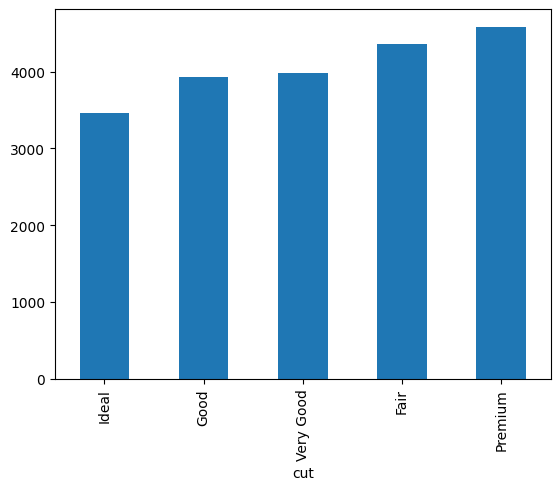

In [20]:
df.groupby("cut")["price"].mean().sort_values().plot(kind = "bar")

## Want to test if the difference betwen price for Good and Very Good are significantly different

<ipython-input-21-9da81ca84460>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df,


<Axes: xlabel='price', ylabel='cut'>

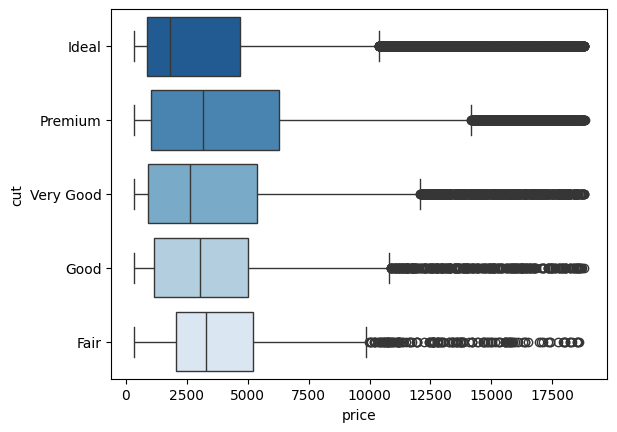

In [21]:
cut_order = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

sns.boxplot(df,
            x = "price",
            y = "cut",
            order=cut_order,
            palette = "Blues_r")

In [ ]:
stats.ttest_ind(df[df["cut"] == "Very Good"]["price"], df[df["cut"] == "Good"]["price"])


In [24]:
Very_Good = df[df["cut"] == "Very Good"]["price"]
Good = df[df["cut"] == "Good"]["price"]

test_results = stats.ttest_ind(Very_Good, Good)

In [25]:
if test_results[1] > 0.05:
  print("Accept H0 with p-value:", test_results[1])
else:
  print("Reject H0 with p-value:", test_results[1])

Accept H0 with p-value: 0.4271234189400054


## London House Price

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


In [3]:
df = pd.read_csv("london_house_price_2018.csv")

In [4]:
df.head()

,fullAddress,postcode,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,currentEnergyRating,price
0,"Flat 1, White Rose Court, Widegate Street, Lon...",E1 7ES,E1,51.517972,-0.078028,2.0,2.0,73.0,1.0,Leasehold,Purpose Built Flat,D,623000
1,"Flat 5, White Rose Court, Widegate Street, Lon...",E1 7ES,E1,51.517972,-0.078028,1.0,2.0,50.0,1.0,Leasehold,Converted Flat,E,575000
2,"9A Petticoat Tower, Petticoat Square, London, ...",E1 7EE,E1,51.515798,-0.077081,1.0,2.0,72.0,2.0,Leasehold,Purpose Built Flat,C,385000
3,"Flat 11, Arcadia Court, 45 Old Castle Street, ...",E1 7NY,E1,51.516568,-0.074793,1.0,1.0,42.0,1.0,Leasehold,Purpose Built Flat,D,370000
4,"Flat 18, Arcadia Court, 45 Old Castle Street, ...",E1 7NY,E1,51.516568,-0.074793,1.0,1.0,39.0,1.0,Leasehold,Purpose Built Flat,C,364000


In [9]:
# Add the price_per_sqm column

df["price_per_sqm"] = df["price"] / df["floorAreaSqM"]

# sample mean of price_per_sqm
mean_price_sqm = df["price_per_sqm"].mean()

# std of price_per_sqm
std_price_sqm = df["price_per_sqm"].std()

# sample size
n = len(df["price_per_sqm"])

# scale
SEM = std_price_sqm / np.sqrt(n)

# Calculate the confidence interval using norm.interval
interval = stats.norm.interval(confidence= 0.95, loc = mean_price_sqm, scale = SEM)

print("mean price per sqm:", mean_price_sqm)
print("95% CI: (", interval[0], ",", interval[1], ")")


mean price per sqm: 7502.891480118485
95% CI: ( 7463.1124828845495 , 7542.67047735242 )


## Hypothesis Testing

H0: price_per_sq in Dulwich = price_per_sqm in Wimbledon

H1: !=

In [11]:


# create a new DataFrame that includes only dulwich samples
dulwich_df = df[df["outcode"] == "SE21"]


# create another DataFrame including only Wimbledon samples
wimbledon_df = df[df["outcode"] == "SW19"]

tst_results = stats.ttest_ind(dulwich_df["price_per_sqm"], wimbledon_df["price_per_sqm"])

if tst_results[1] > 0.05:
  print("Accept H0 with p-value", tst_results[1])
else:
  print("Reject H0 with p-value", tst_results[1])


Reject H0 with p-value 9.7521016289875e-09
